In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
from IPython.display import display
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.model_selection import (cross_val_score, cross_val_predict, 
                                     train_test_split, GridSearchCV)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, auc)
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.utils import resample
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')

from matplotlib.colors import LinearSegmentedColormap 
colors = [(0.9, 0.7, 0), (0.9, 0.9, 0.9), (0, 0, 0.9)]  # gold to white to blue
colorsgold = [(1, 1, 1), (0.9, 0.7, 0)]  # white to gold
cmap = LinearSegmentedColormap.from_list("gold_blue", colors) 
cmapgold = LinearSegmentedColormap.from_list("gold_blue", colorsgold) 


# <p style="background-color:#300eee;font-family:avenir; color:white; text-align:center; font-size:30px; padding:8px; border-radius:20px;">Visualisation des données </p> 

## Visualisation du data frame

In [2]:
hmeq = pd.read_csv('/Users/tonin/Documents/SCOLAIRE/MOSEF/SCORING/hmeq.csv')
print("="*50)
print("Aperçu des premières lignes du jeu de données HMEQ :")
print("="*50)
hmeq.head()

Aperçu des premières lignes du jeu de données HMEQ :


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
print("\n" + "="*50)
print("Statistiques descriptives des variables numériques :")
print("="*50)
hmeq.describe()


Statistiques descriptives des variables numériques :


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


## Type de variables et Valeurs manquantes

In [4]:
hmeq_types = hmeq.dtypes.reset_index()
hmeq_types.columns = ['Variable', 'Type']
hmeq_types

,Variable,Type
0,BAD,int64
1,LOAN,int64
2,MORTDUE,float64
3,VALUE,float64
4,REASON,object
5,JOB,object
6,YOJ,float64
7,DEROG,float64
8,DELINQ,float64
9,CLAGE,float64


In [5]:
missing_data_total = hmeq.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values Total')
missing_data_total['Percentage Missing Total'] = (missing_data_total['Missing Values Total'] / len(hmeq)) * 100

# Calculer les valeurs manquantes pour BAD = 1
hmeq_bad_1 = hmeq[hmeq['BAD'] == 1]
missing_data_bad_1 = hmeq_bad_1.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values BAD = 1')
missing_data_bad_1['Percentage Missing BAD = 1'] = (missing_data_bad_1['Missing Values BAD = 1'] / len(hmeq_bad_1)) * 100

# Calculer les valeurs manquantes pour BAD = 0
hmeq_bad_0 = hmeq[hmeq['BAD'] == 0]
missing_data_bad_0 = hmeq_bad_0.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values BAD = 0')
missing_data_bad_0['Percentage Missing BAD = 0'] = (missing_data_bad_0['Missing Values BAD = 0'] / len(hmeq_bad_0)) * 100

missing_data_combined = missing_data_total.merge(missing_data_bad_1, on='Variables').merge(missing_data_bad_0, on='Variables')

missing_data_combined = missing_data_combined.sort_values(by='Percentage Missing Total', ascending=False)
missing_data_combined


,Variables,Missing Values Total,Percentage Missing Total,Missing Values BAD = 1,Percentage Missing BAD = 1,Missing Values BAD = 0,Percentage Missing BAD = 0
12,DEBTINC,1267,21.258389,786,66.105971,481,10.081744
7,DEROG,708,11.879195,87,7.317073,621,13.016139
8,DELINQ,580,9.731544,72,6.055509,508,10.647663
2,MORTDUE,518,8.691275,106,8.915055,412,8.635506
6,YOJ,515,8.640940,65,5.466779,450,9.431985
10,NINQ,510,8.557047,75,6.307822,435,9.117585
9,CLAGE,308,5.167785,78,6.560135,230,4.820792
5,JOB,279,4.681208,23,1.934399,256,5.365751
4,REASON,252,4.228188,48,4.037006,204,4.275833
11,CLNO,222,3.724832,53,4.457527,169,3.542234


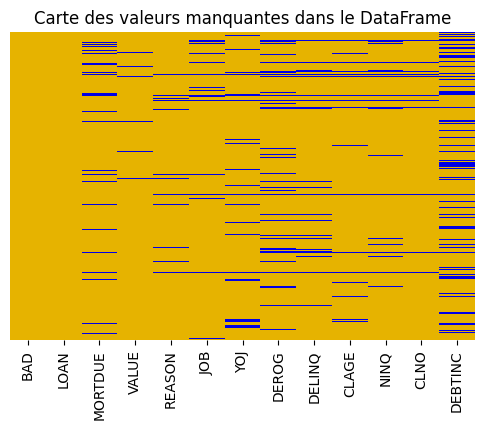

In [6]:
plt.figure(figsize=(6, 4))  
sns.heatmap(hmeq.isnull(), cbar=False, cmap=cmap, yticklabels=False, 
            cbar_kws={'label': 'Valeurs Manquantes'})
plt.title('Carte des valeurs manquantes dans le DataFrame', fontsize=12)
plt.show()

## Analyse des Distributions et des Propriétés Statistiques des Variables Numériques

### La variable à expliquer : BAD

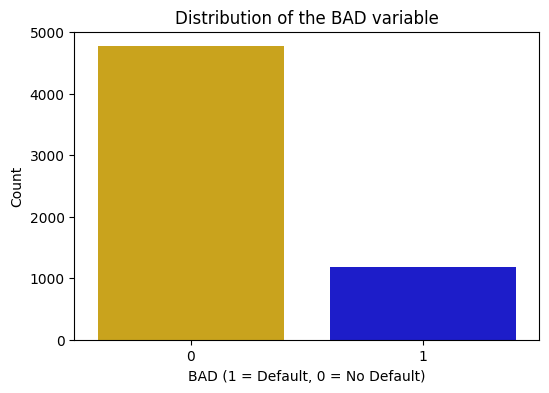

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='BAD', data=hmeq, palette=cmap(np.linspace(0, 1, 2)))
plt.title('Distribution of the BAD variable')
plt.xlabel('BAD (1 = Default, 0 = No Default)')
plt.ylabel('Count')
plt.show()

In [8]:
numeric_columns = hmeq.select_dtypes(include=['number']).columns.drop('BAD')
skewness = hmeq[numeric_columns].skew()
kurtosis = hmeq[numeric_columns].kurtosis()
print("="*50)
print("### Skewness (Asymétrie) des variables ###")
print("="*50)
print(skewness)
print("\n" + "="*50)
print("### Kurtosis (Aplatissement) des variables ###")
print("="*50)
print(kurtosis)

### Skewness (Asymétrie) des variables ###
LOAN       2.023781
MORTDUE    1.814481
VALUE      3.053344
YOJ        0.988460
DEROG      5.320870
DELINQ     4.023150
CLAGE      1.343412
NINQ       2.621984
CLNO       0.775052
DEBTINC    2.852353
dtype: float64

### Kurtosis (Aplatissement) des variables ###
LOAN        6.932590
MORTDUE     6.481866
VALUE      24.362805
YOJ         0.372072
DEROG      36.872763
DELINQ     23.565449
CLAGE       7.599549
NINQ        9.786507
CLNO        1.157673
DEBTINC    50.504042
dtype: float64


### Variables numériques

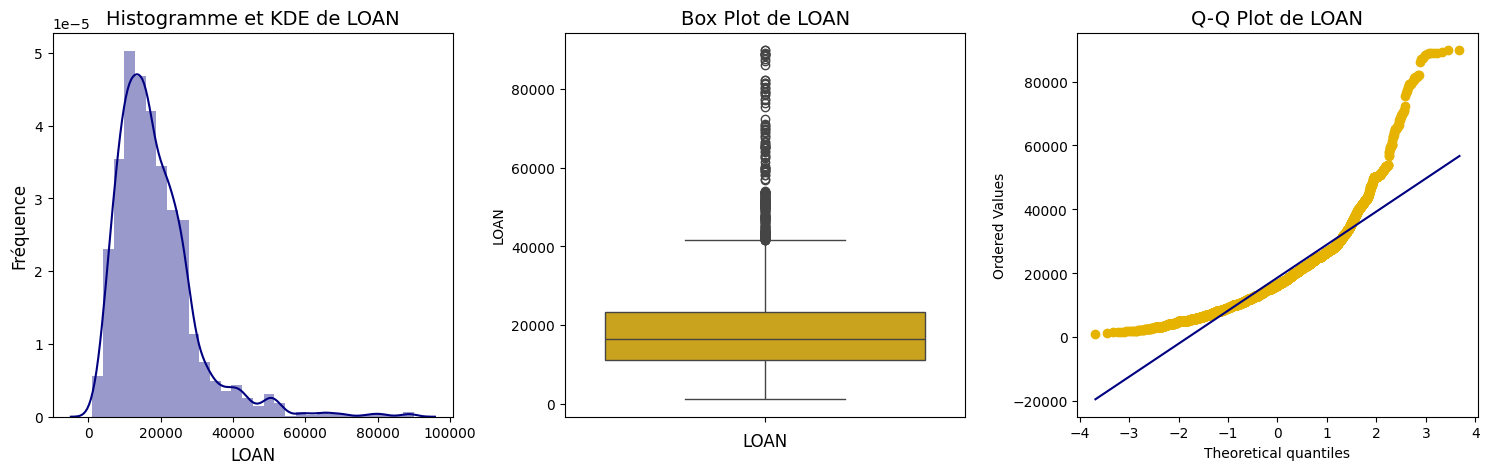

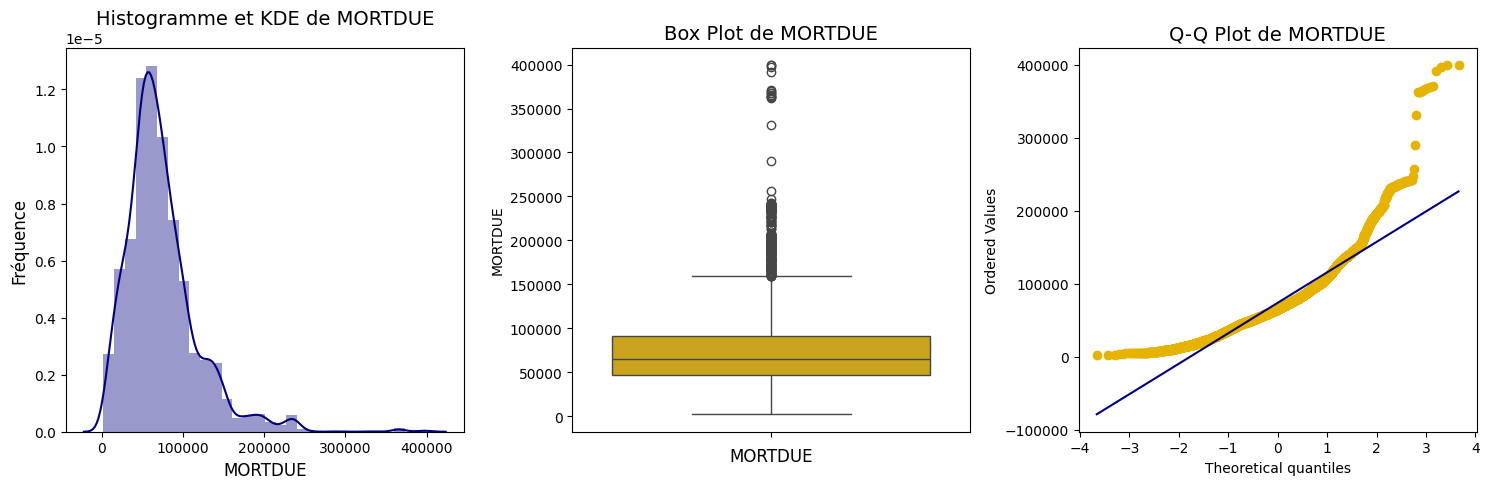

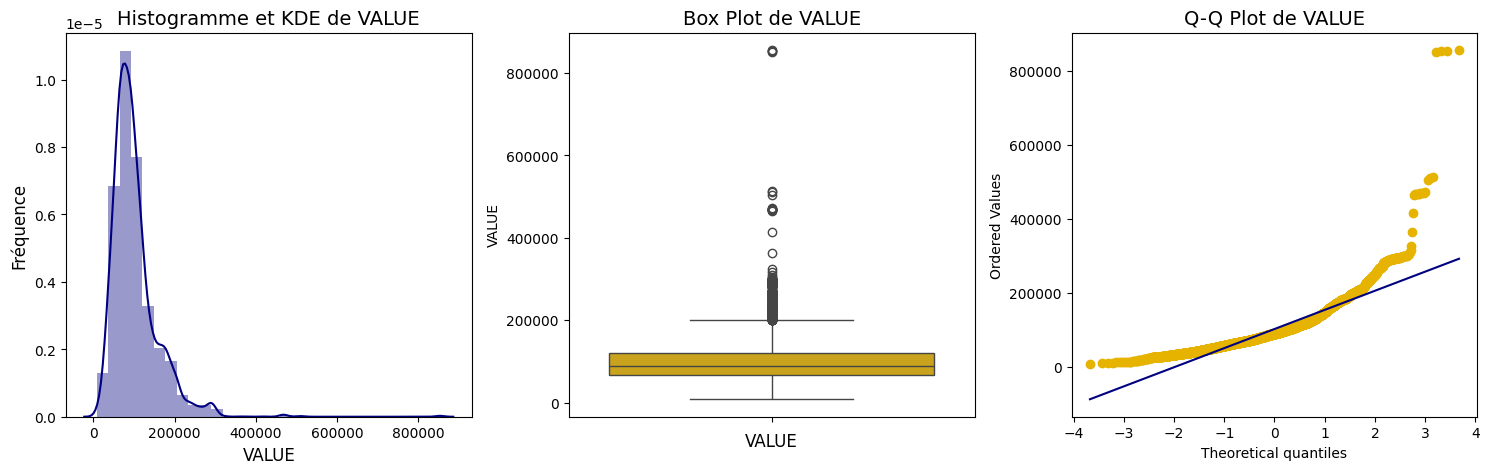

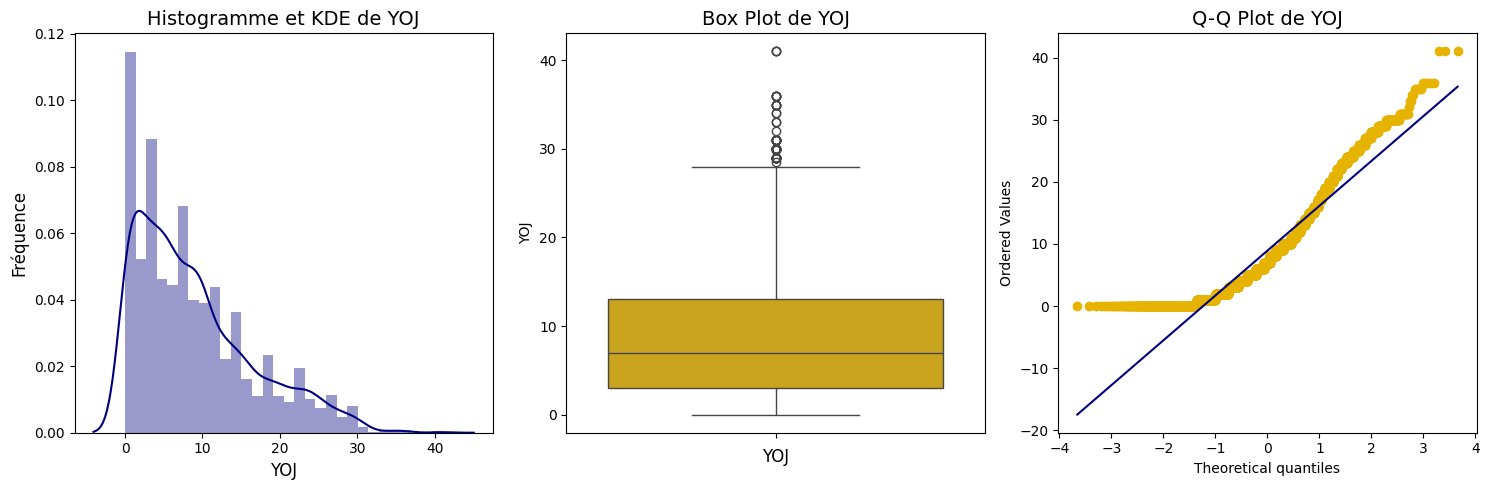

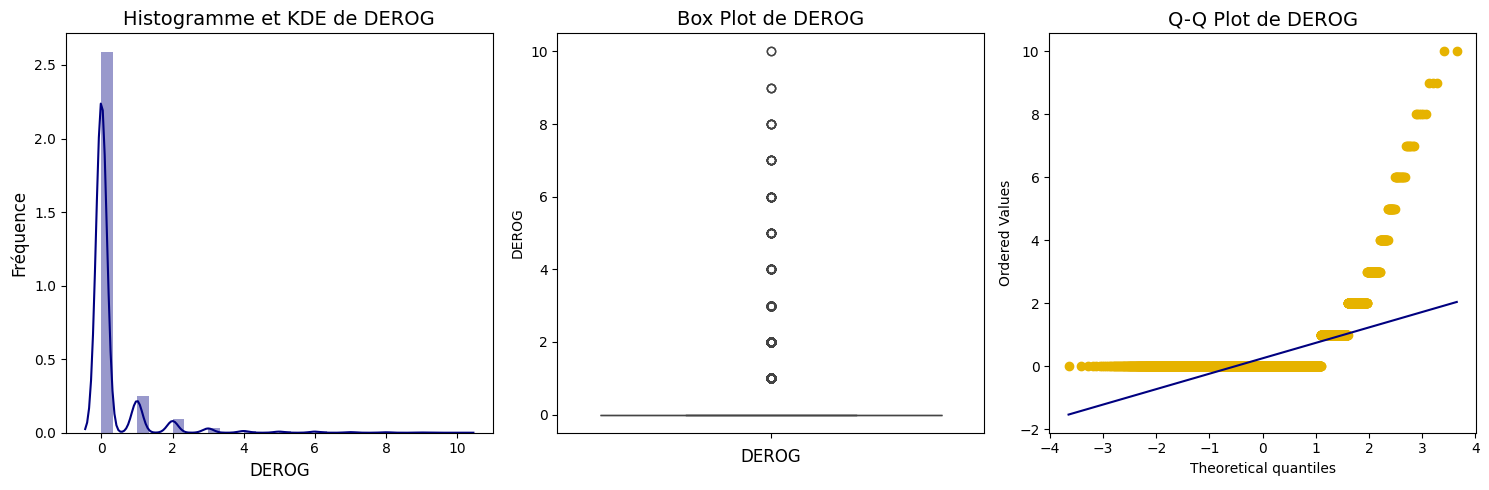

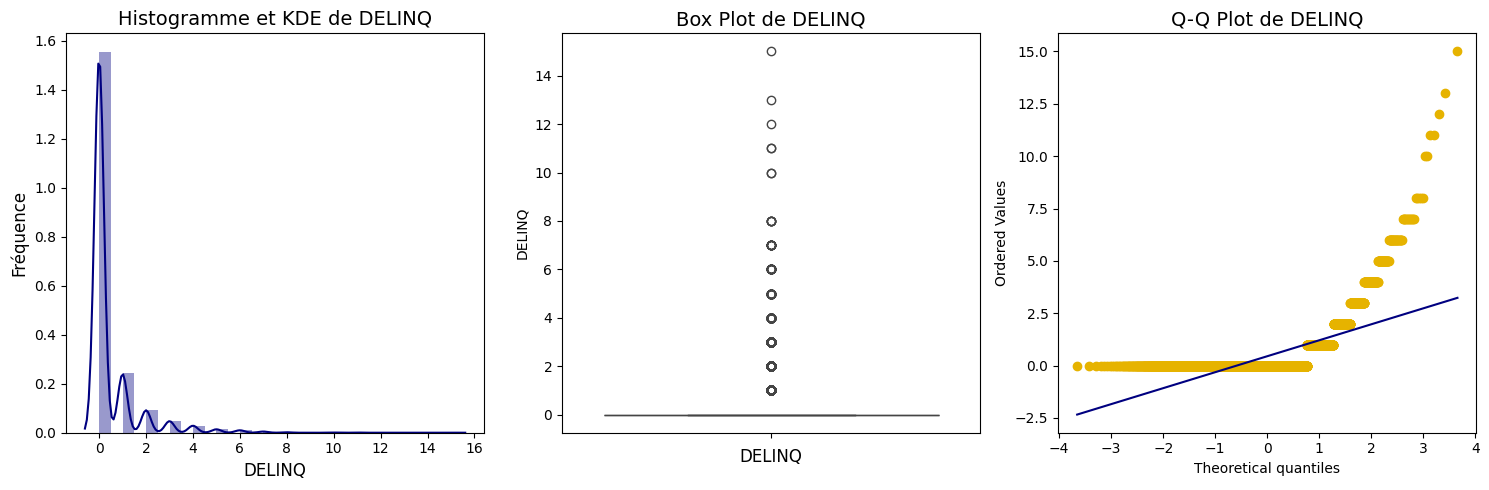

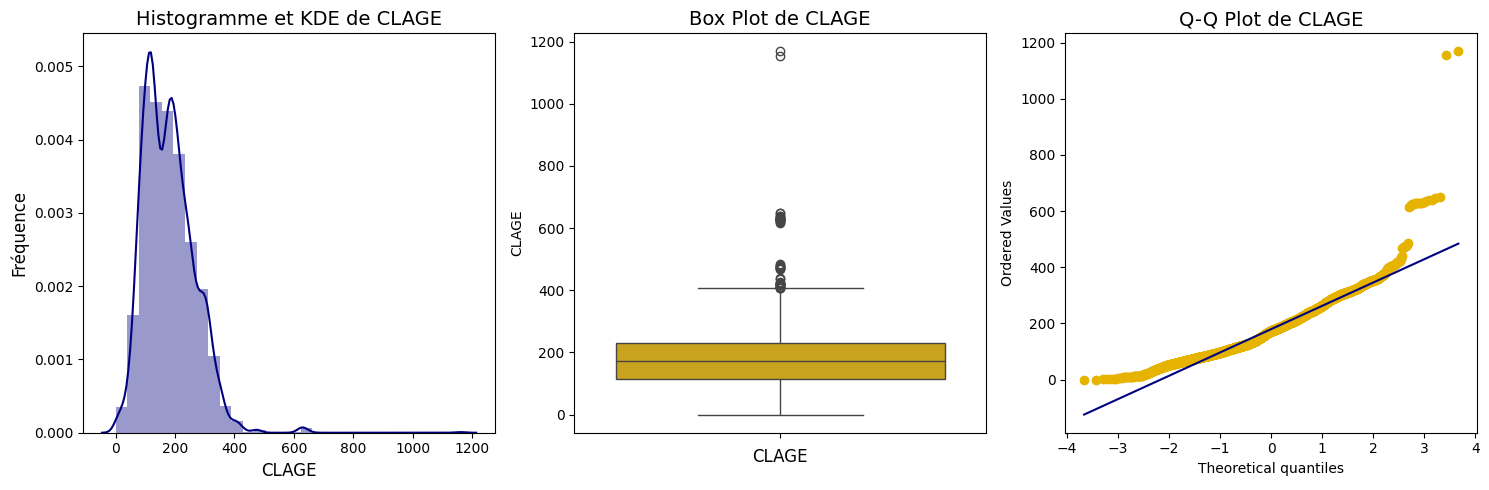

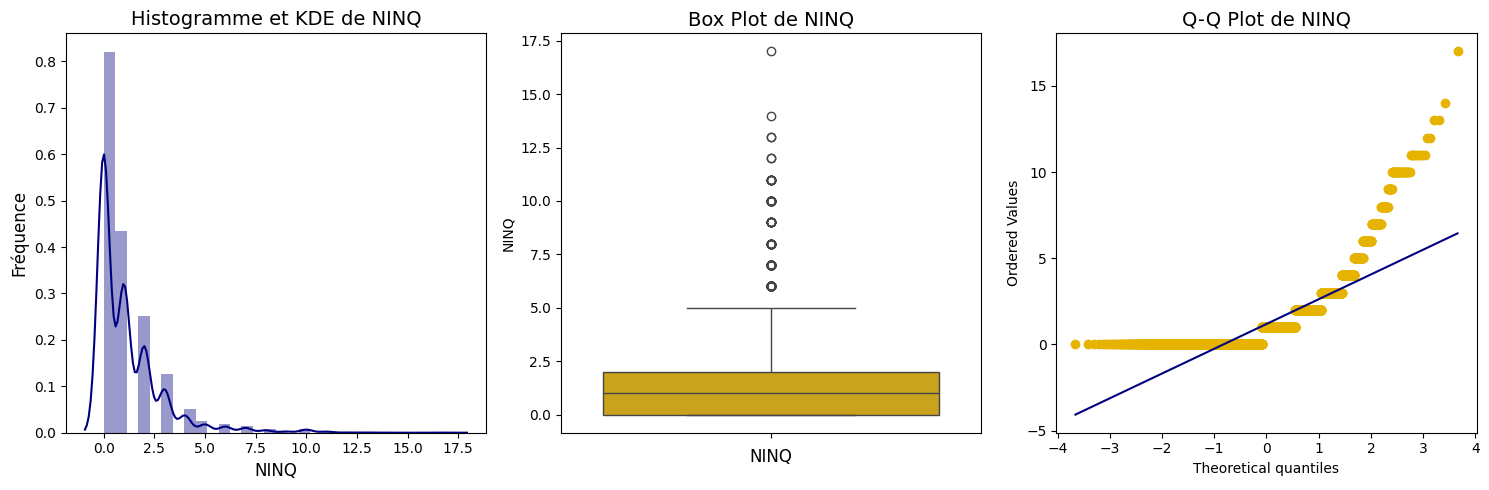

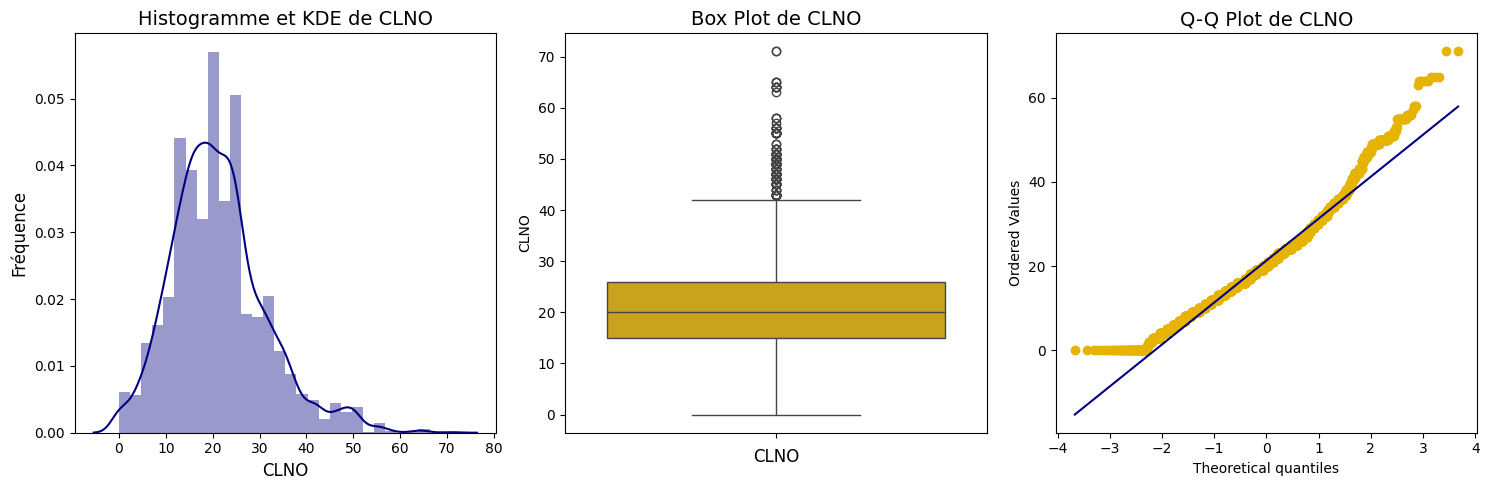

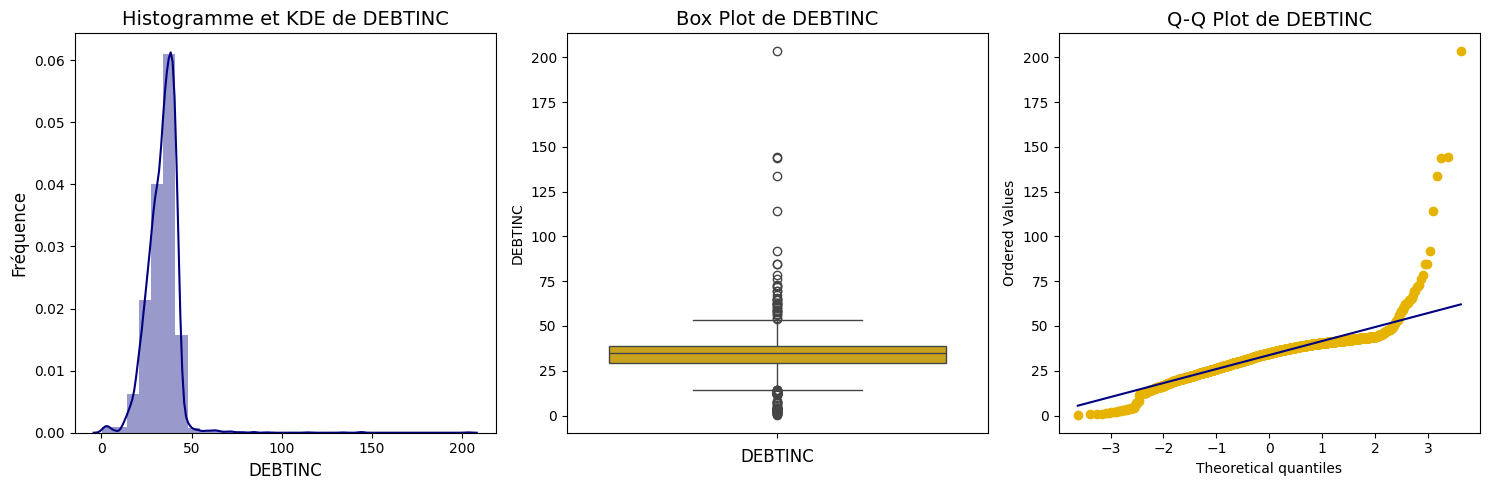

In [9]:
for col in numeric_columns:
    data = hmeq[col].dropna()
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.distplot(data, kde=True, color='navy', bins=30)
    plt.title(f'Histogramme et KDE de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Fréquence', fontsize=12)

    plt.subplot(1, 3, 2)
    sns.boxplot(data, color=(0.9, 0.7, 0))
    plt.title(f'Box Plot de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    
    plt.subplot(1, 3, 3)
    stats.probplot(data, dist="norm", plot=plt)
    plt.gca().get_lines()[0].set_color((0.9, 0.7, 0))  
    plt.gca().get_lines()[1].set_color('navy') 
    plt.title(f'Q-Q Plot de {col}', fontsize=14)
    plt.tight_layout()
    plt.show()

### Variables catégorielle

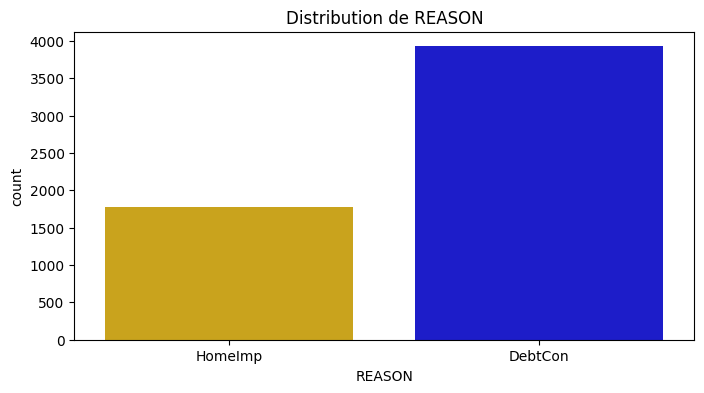

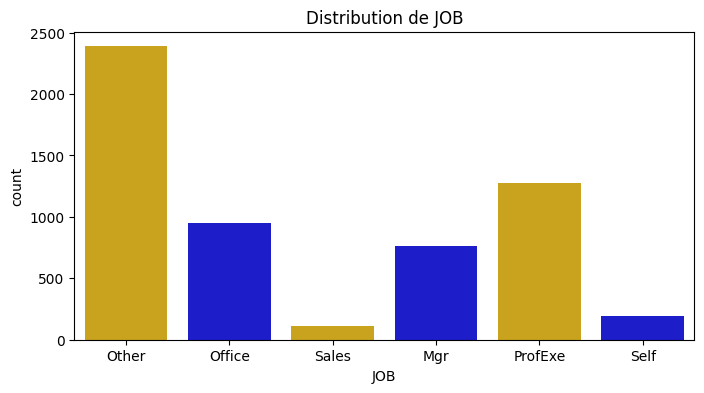

In [10]:
categorical_columns = ['REASON', 'JOB']  
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=hmeq, palette=cmap(np.linspace(0, 1, 2)))
    plt.title(f"Distribution de {col}")
    plt.show()

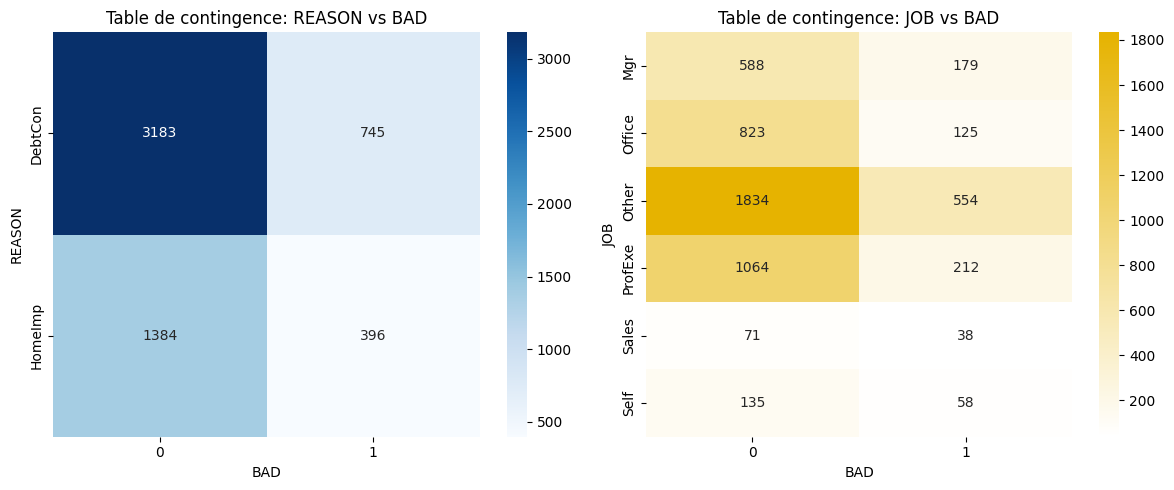

In [11]:
contingency_table_reason_bad = pd.crosstab(hmeq['REASON'], hmeq['BAD'])
contingency_table_job_bad = pd.crosstab(hmeq['JOB'], hmeq['BAD'])
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(contingency_table_reason_bad, annot=True, cmap="Blues", fmt="d")
plt.title("Table de contingence: REASON vs BAD")
plt.subplot(1, 2, 2)
sns.heatmap(contingency_table_job_bad, annot=True, cmap=cmapgold, fmt="d")
plt.title("Table de contingence: JOB vs BAD")
plt.tight_layout()
plt.show()

### Repartion des varaibles selon BAD 

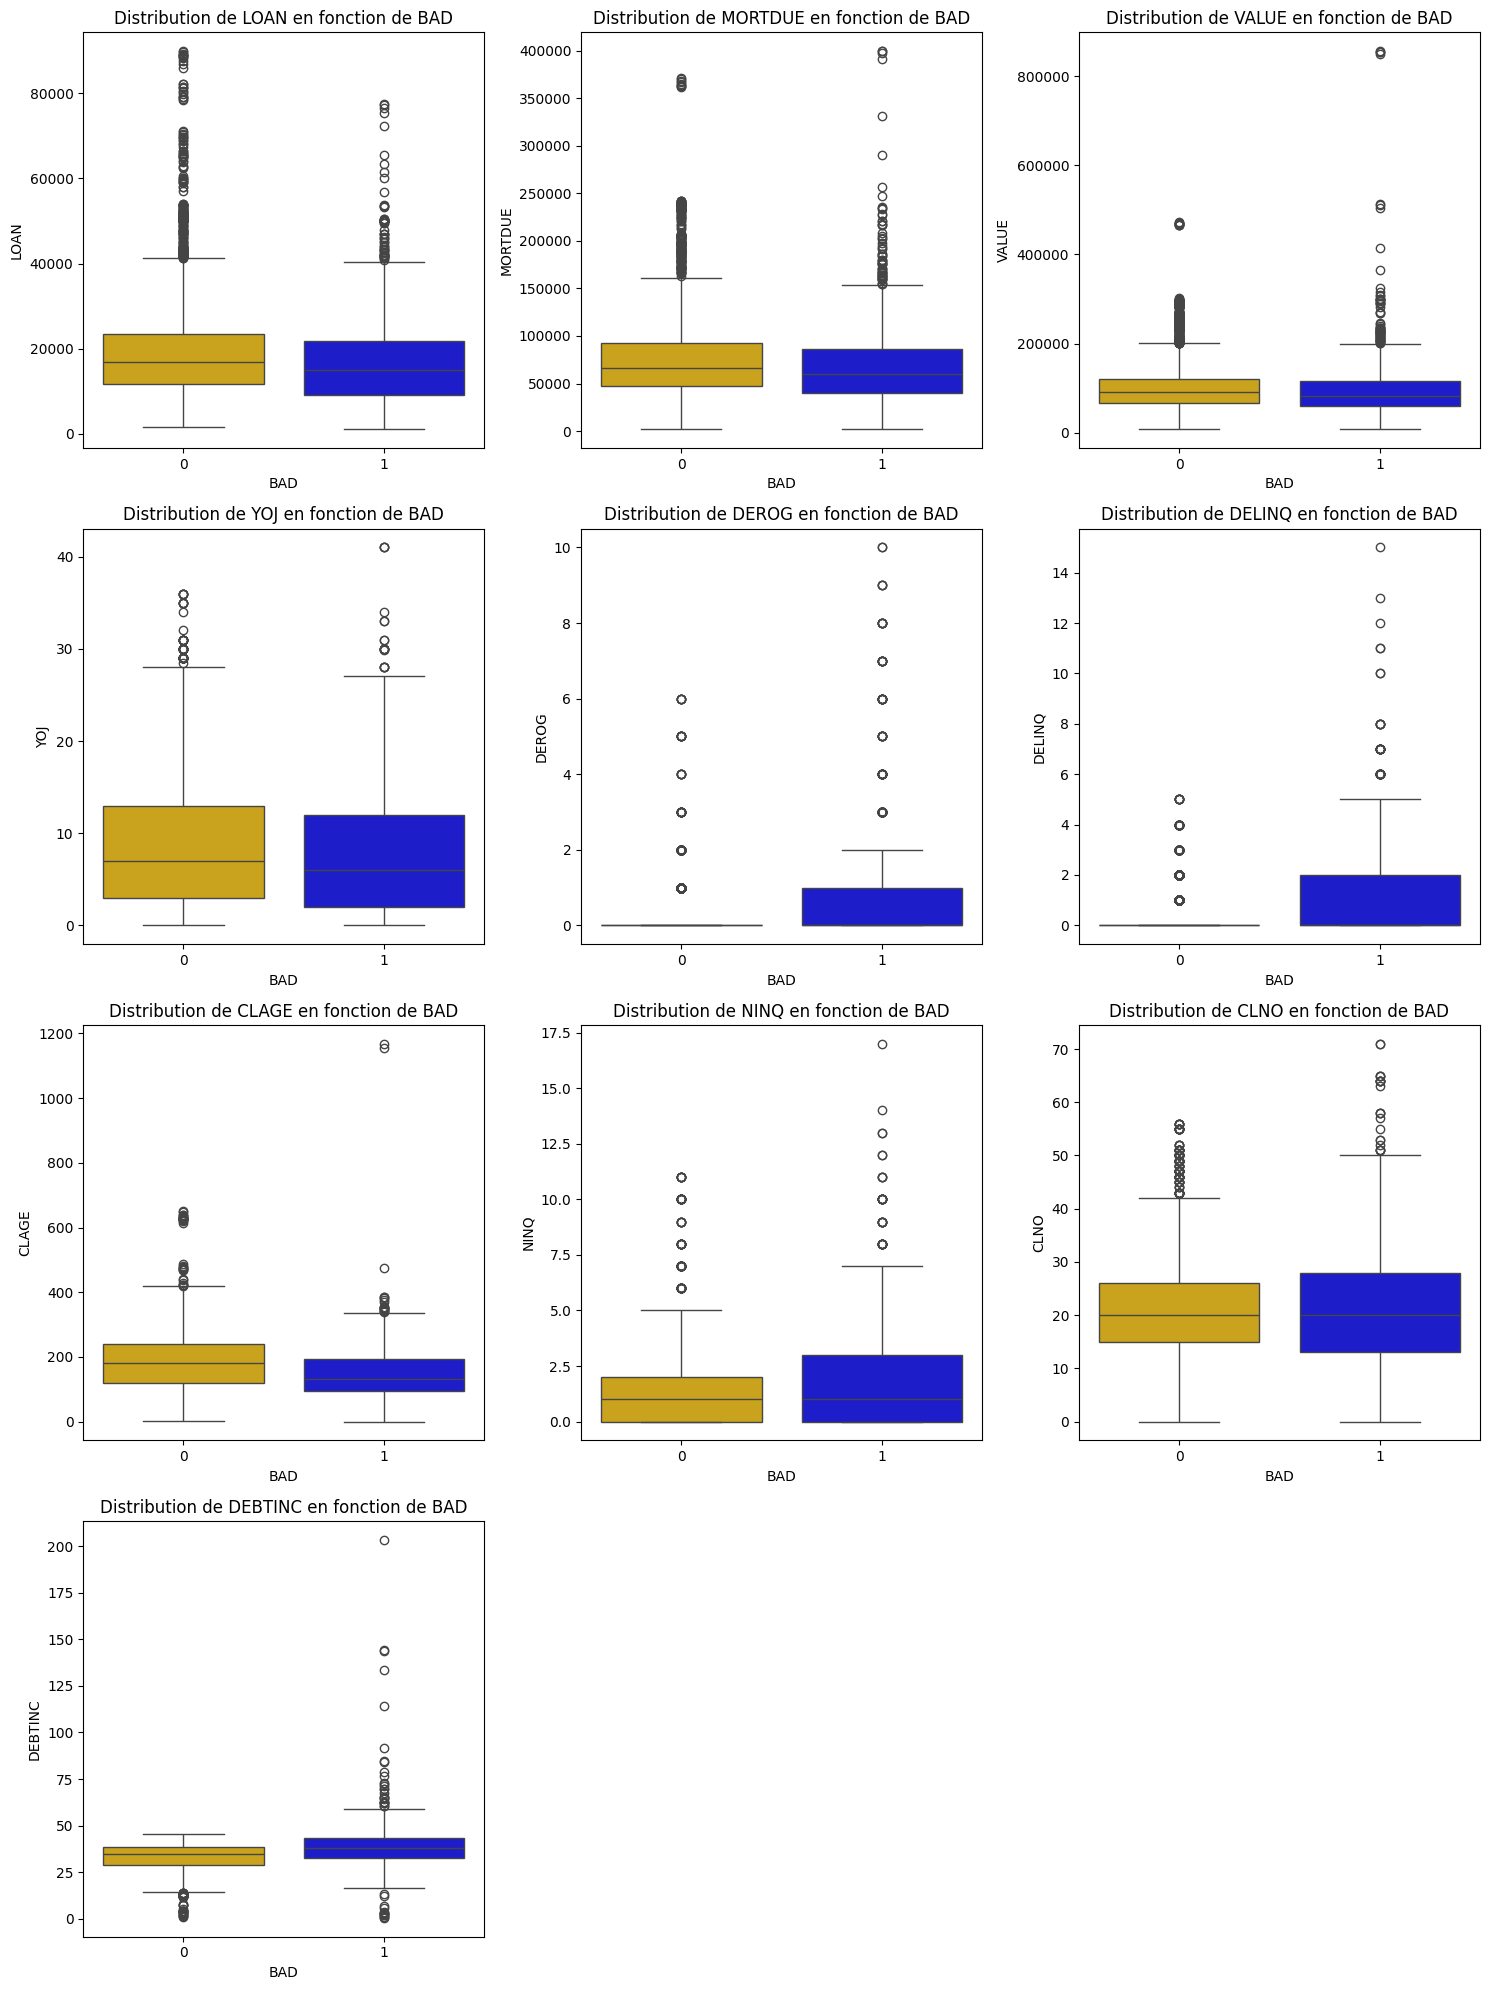

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(x='BAD', y=col, data=hmeq, palette=cmap(np.linspace(0, 1, 2)), ax=axes[i])
    axes[i].set_title(f"Distribution de {col} en fonction de BAD")

# Supprimer les axes vides
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

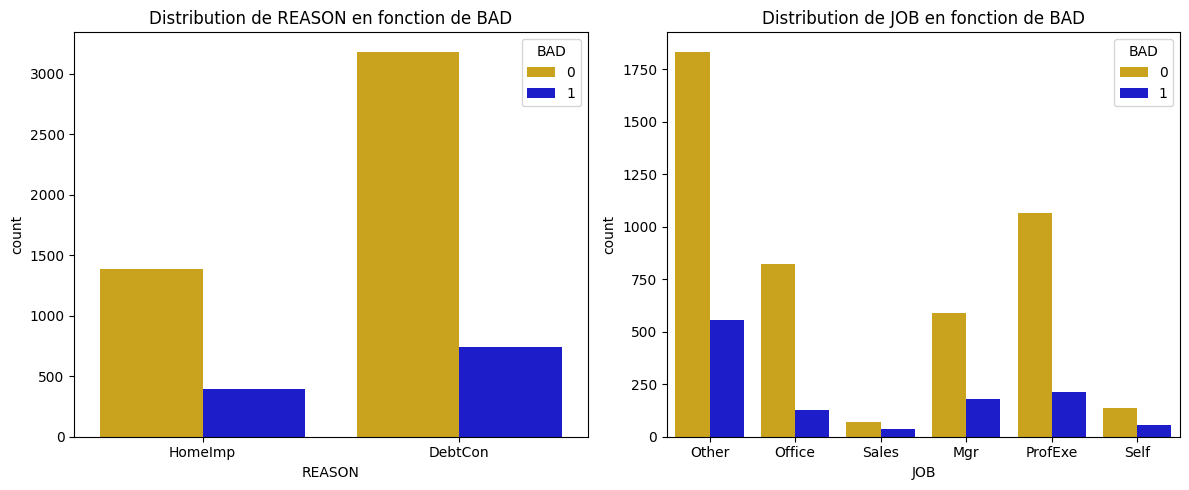

In [13]:
categorical_columns = ['REASON', 'JOB']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(x='REASON', hue='BAD', data=hmeq, ax=axes[0], palette=cmap(np.linspace(0, 1, 2)))
axes[0].set_title("Distribution de REASON en fonction de BAD")

sns.countplot(x='JOB', hue='BAD', data=hmeq, ax=axes[1], palette=cmap(np.linspace(0, 1, 2)))
axes[1].set_title("Distribution de JOB en fonction de BAD")

plt.tight_layout()
plt.show()


## Analyse de la Correlation et du VIF

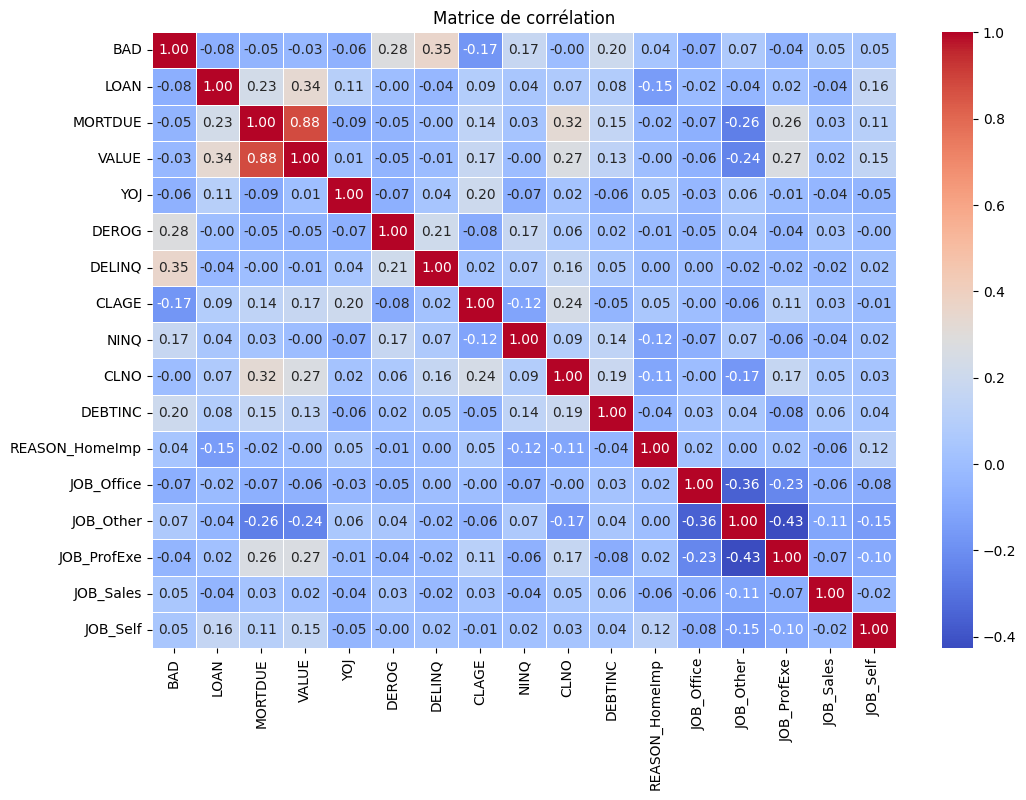

In [14]:
hmeq_corr=hmeq.copy()
hmeq_corr=pd.get_dummies(hmeq_corr, columns=['REASON', 'JOB'], drop_first=True)
plt.figure(figsize=(12, 8))
corr_matrix = hmeq_corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()


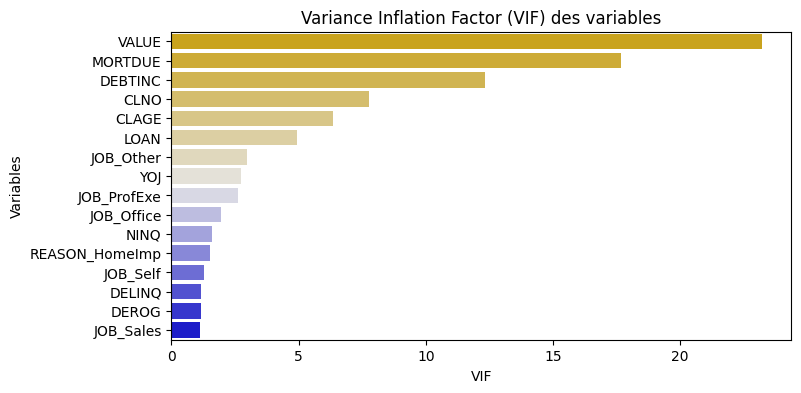

In [15]:
hmeq_corr = hmeq_corr.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X = hmeq_corr.drop(columns=['BAD'], errors='ignore').select_dtypes(include=[np.number]).dropna()
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data = vif_data.sort_values(by="VIF", ascending=False)
vif_data

# Visualiser le VIF
plt.figure(figsize=(8, 4))
sns.barplot(x="VIF", y="Variable", data=vif_data, palette=cmap(np.linspace(0, 1, len(vif_data)))   )
plt.title("Variance Inflation Factor (VIF) des variables")
plt.xlabel("VIF")
plt.ylabel("Variables")
plt.show()

# <p style="background-color:#300eee;font-family:avenir; color:white; text-align:center; font-size:30px; padding:8px; border-radius:20px;">Traitement des données </p> 

## Variables catégorielles

### 1) Imputation des variables catégorielles

In [16]:
categorical_columns = ['REASON', 'JOB']
imputer_mode = SimpleImputer(strategy='most_frequent')
hmeq[categorical_columns] = imputer_mode.fit_transform(hmeq[categorical_columns])

### 2) Encoding des variables catégorielles 

In [17]:
df_encoded = pd.get_dummies(hmeq, columns=categorical_columns, drop_first=True)

## Création d'une nouvelle variable (_DEBTINC_MISSING_)

In [18]:
df_encoded['DEBTINC_MISSING']= np.where(df_encoded['DEBTINC'].isnull(),1,0)

## Variables numériques

### Imputation des variables catégorielles par regression lineaire

In [19]:
df_encoded= df_encoded.dropna(thresh=df_encoded.shape[1] - 6 + 1)

In [20]:
df_full=df_encoded.copy()

In [21]:
predictor_columns = ['BAD', 'LOAN', 'REASON_HomeImp','JOB_Office','JOB_Other','JOB_ProfExe','JOB_Sales','JOB_Self']
def impute_with_regression(df, col_to_impute, predictors):
    missing_mask = df[col_to_impute].isnull()
    df_train = df_encoded[~missing_mask]
    df_missing = df_encoded[missing_mask]
    X_train = df_train[predictors]
    y_train = df_train[col_to_impute]
    X_missing = df_missing[predictors]
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    predicted_values = reg.predict(X_missing)
    df.loc[missing_mask, col_to_impute] = predicted_values

columns_with_missing = [col for col in df_full.columns if df_full[col].isnull().sum() > 0]
for col in columns_with_missing:
    impute_with_regression(df_full, col, predictor_columns)
print(df_full.describe())

               BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  5796.000000   5796.000000    5796.000000    5796.000000  5796.000000   
mean      0.196687  18771.256039   73349.798064  102250.688465     8.966662   
std       0.397528  11270.525299   43137.946396   57331.353730     7.330042   
min       0.000000   1100.000000    2063.000000    8000.000000     0.000000   
25%       0.000000  11200.000000   47822.250000   66648.750000     3.000000   
50%       0.000000  16500.000000   64934.235162   89801.500000     8.000000   
75%       0.000000  23500.000000   89888.250000  120132.250000    13.000000   
max       1.000000  89900.000000  399550.000000  855909.000000    41.000000   

             DEROG       DELINQ        CLAGE         NINQ         CLNO  \
count  5796.000000  5796.000000  5796.000000  5796.000000  5796.000000   
mean      0.247767     0.438166   179.628018     1.181998    21.289255   
std       0.806981     1.088601    84.724784     1.678180    10.09

In [22]:
new_missing_data = df_full.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values Total')
new_missing_data

,Variables,Missing Values Total
0,BAD,0
1,LOAN,0
2,MORTDUE,0
3,VALUE,0
4,YOJ,0
5,DEROG,0
6,DELINQ,0
7,CLAGE,0
8,NINQ,0
9,CLNO,0


## Création de nouvelles variables

In [23]:
df_new_variables=df_full.copy()
df_new_variables['MORT_VALUE'] = np.log(df_new_variables['VALUE'] + 1) + np.log(df_new_variables['MORTDUE'] + 1)
df_new_variables.drop(['MORTDUE', 'VALUE'], axis=1, inplace=True)
df_new_variables['DE_LINQ_ROG'] = df_new_variables['DELINQ'] + df_new_variables['DEROG']
df_new_variables.drop(['DELINQ', 'DEROG'], axis=1, inplace=True)

In [24]:
correlation_with_bad = df_new_variables.corr()['BAD']
absolute_correlation_with_bad = df_new_variables.corr()['BAD'].abs()
correlation_table = pd.DataFrame({
    'Correlation with BAD': correlation_with_bad,
    'Absolute Correlation with BAD': absolute_correlation_with_bad
})

correlation_table.sort_values(by='Absolute Correlation with BAD', ascending=False)


,Correlation with BAD,Absolute Correlation with BAD
BAD,1.000000,1.000000
DEBTINC_MISSING,0.544419,0.544419
DE_LINQ_ROG,0.420598,0.420598
DEBTINC,0.308128,0.308128
NINQ,0.176419,0.176419
CLAGE,-0.172333,0.172333
MORT_VALUE,-0.083530,0.083530
JOB_Office,-0.077978,0.077978
LOAN,-0.071944,0.071944
YOJ,-0.066752,0.066752


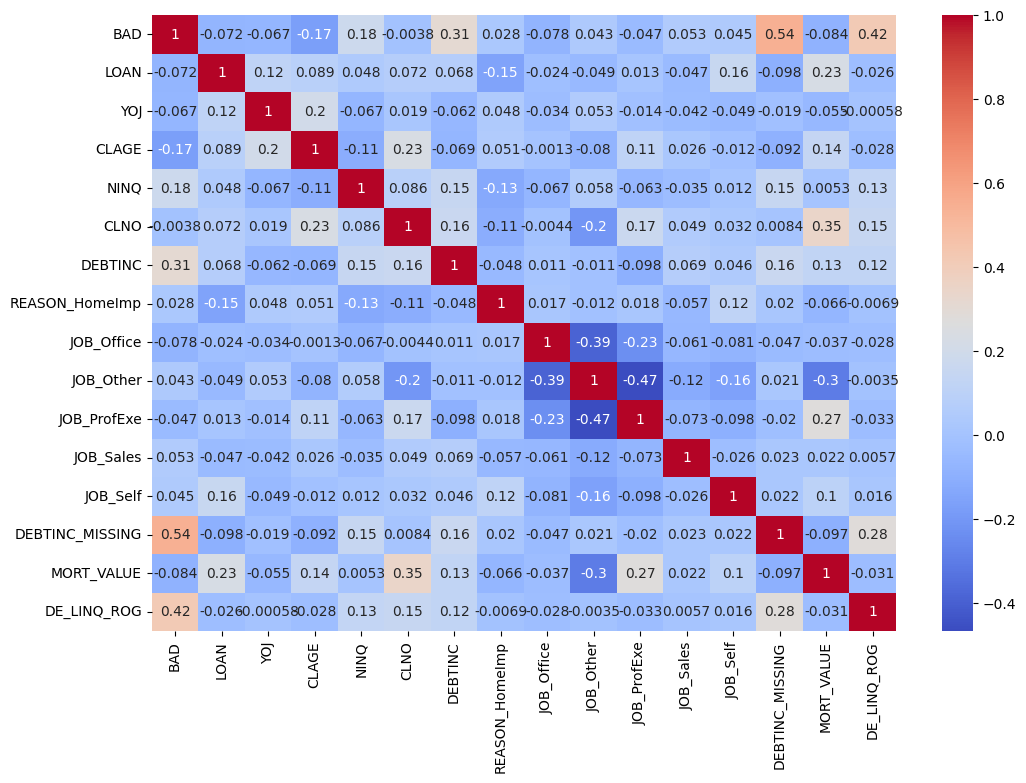

In [25]:
correlation_matrix = df_new_variables.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# <p style="background-color:#300eee;font-family:avenir; color:white; text-align:center; font-size:30px; padding:8px; border-radius:20px;">Modélisation</p>

## Régression Logistique

In [26]:
X = df_new_variables.drop(columns=['BAD'])
y = df_new_variables['BAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##  Sélection des variables avec la méthode RFE 

In [27]:
model_log = LogisticRegression(random_state=42)

rfe = RFE(model_log, n_features_to_select=8)
rfe.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe.support_]
print("Variables sélectionnées par RFE :\n", selected_features)

X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

Variables sélectionnées par RFE :
 Index(['YOJ', 'CLAGE', 'CLNO', 'DEBTINC', 'REASON_HomeImp', 'JOB_Office',
       'DEBTINC_MISSING', 'DE_LINQ_ROG'],
      dtype='object')


## Modèle de Regression avec les variables sélectionnées 

Meilleurs hyperparamètres trouvés : {'C': np.float64(0.1), 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy moyenne de la validation croisée : 0.93
Matrice de confusion :
 [[884  23]
 [ 80 173]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       907
           1       0.88      0.68      0.77       253

    accuracy                           0.91      1160
   macro avg       0.90      0.83      0.86      1160
weighted avg       0.91      0.91      0.91      1160

Accuracy sur l'ensemble de test : 0.91
AUC : 0.89


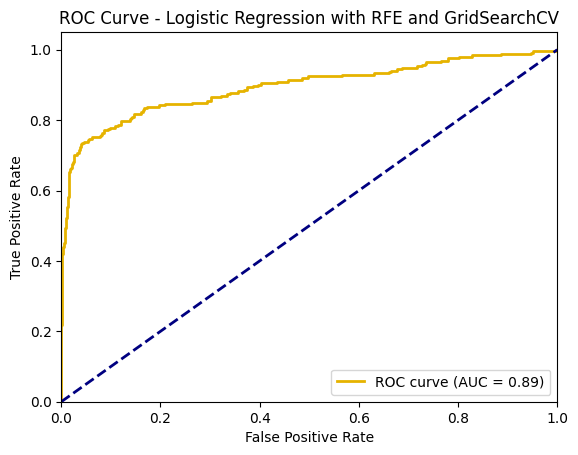

In [28]:
param_grid = {
    'C': np.logspace(-3, 3, 7),  
    'penalty': ['l1', 'l2'],     
    'solver': ['liblinear', 'lbfgs']  
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_rfe, y_train)

print("Meilleurs hyperparamètres trouvés :", grid_search.best_params_)

best_model_log = grid_search.best_estimator_

cv_scores = cross_val_score(best_model_log, X_train_rfe, y_train, cv=5, scoring='accuracy')
print(f"Accuracy moyenne de la validation croisée : {cv_scores.mean():.2f}")

best_model_log.fit(X_train_rfe, y_train)

y_pred = best_model_log.predict(X_test_rfe)

conf_matrix = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

y_prob = best_model_log.predict_proba(X_test_rfe)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("Matrice de confusion :\n", conf_matrix)
print("\nRapport de classification :\n", classif_report)
print(f"Accuracy sur l'ensemble de test : {accuracy:.2f}")
print(f"AUC : {roc_auc:.2f}")

plt.figure()
plt.plot(fpr, tpr, color=(0.9, 0.7, 0), lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression with RFE and GridSearchCV')
plt.legend(loc="lower right")
plt.show()

## Discretisation des variables continues 

max_leaf_nodes : 2 | Seuil pour YOJ: 5.65 | Tschuprow: 0.0848
max_leaf_nodes : 2 | Seuil pour CLAGE: 166.37 | Tschuprow: 0.1883
max_leaf_nodes : 2 | Seuil pour CLNO: 3.50 | Tschuprow: 0.1064
max_leaf_nodes : 2 | Seuil pour DEBTINC: 37.76 | Tschuprow: 0.4160
max_leaf_nodes : 2 | Seuil pour DE_LINQ_ROG: 1.33 | Tschuprow: 0.3866
max_leaf_nodes : 3 | Seuil pour YOJ: 5.65 | Tschuprow: 0.1140
max_leaf_nodes : 3 | Seuil pour CLAGE: 166.37 | Tschuprow: 0.2059
max_leaf_nodes : 3 | Seuil pour CLNO: 3.50 | Tschuprow: 0.1497
max_leaf_nodes : 3 | Seuil pour DEBTINC: 37.76 | Tschuprow: 0.4501
max_leaf_nodes : 3 | Seuil pour DE_LINQ_ROG: 1.33 | Tschuprow: 0.4169


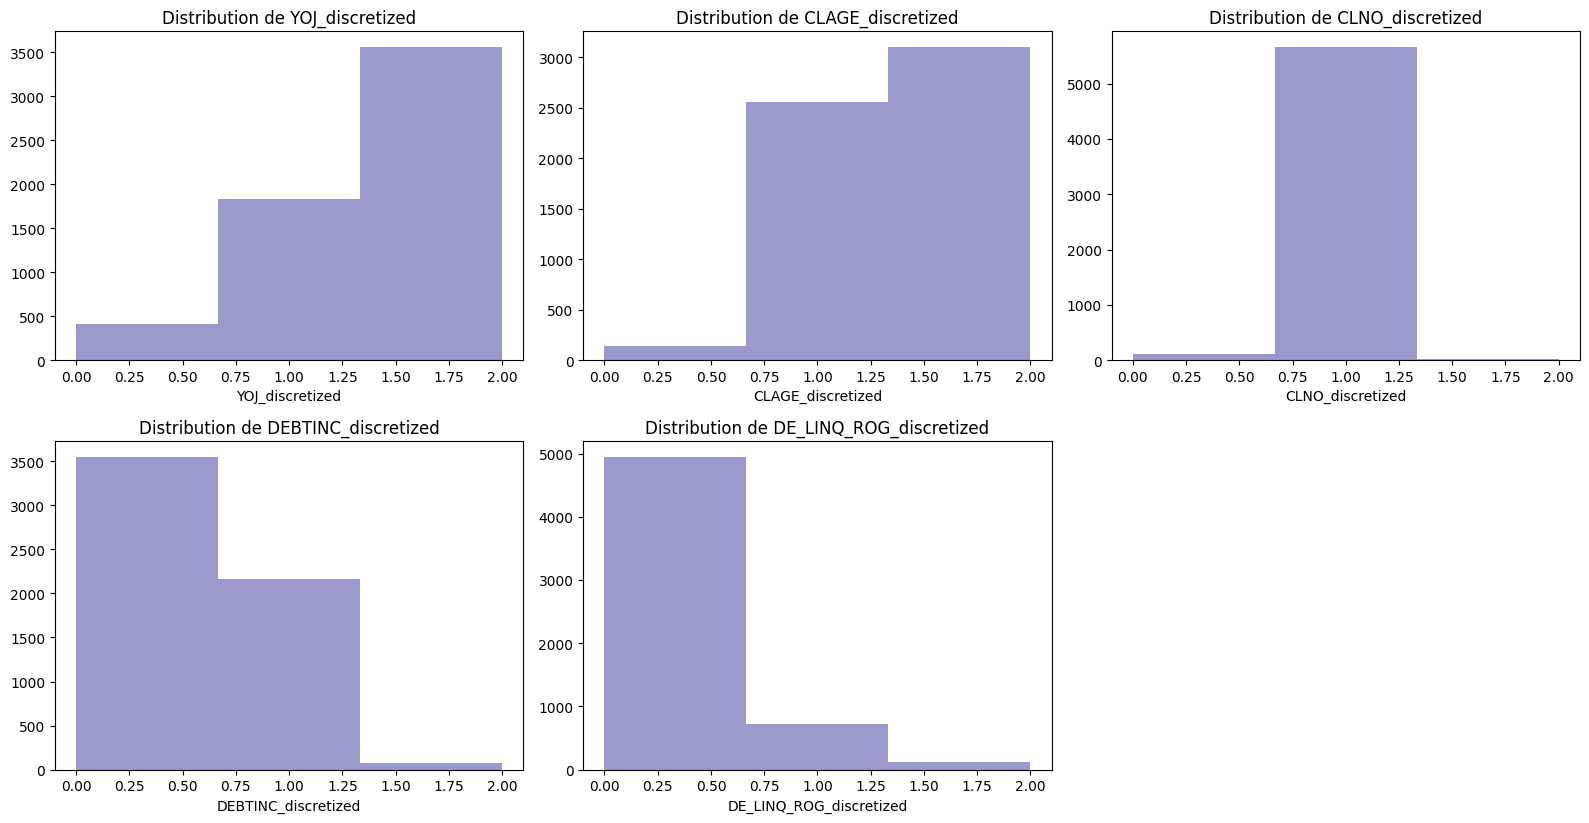

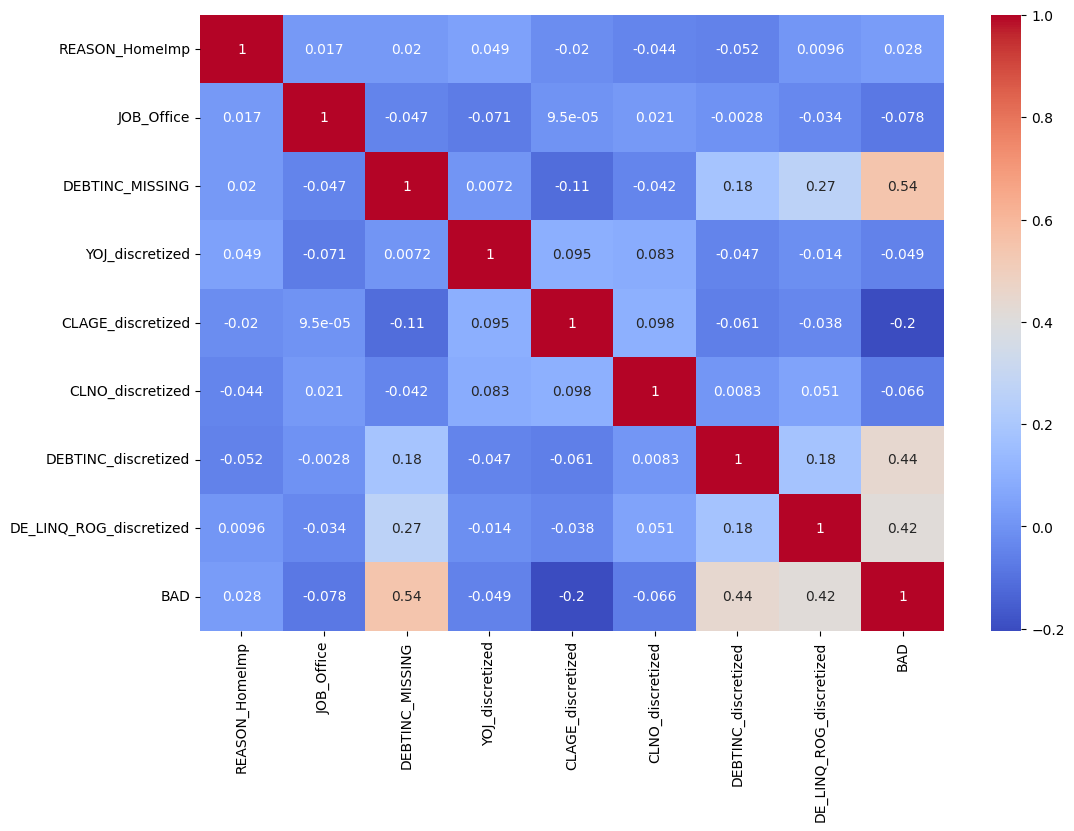

In [29]:

selected_variables = ['YOJ', 'CLAGE', 'CLNO', 'DEBTINC', 'DE_LINQ_ROG'] # variables continues choisit avec le RFE
X = df_new_variables[selected_variables]
y = df_new_variables['BAD']
discretized_vars = {}

def tschuprow_statistic(discretized_var, target_var):
    contingency_table = pd.crosstab(discretized_var, target_var)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape) - 1
    tschuprow = np.sqrt(chi2 / (n * k))
    return tschuprow

for var in selected_variables:
    tree = DecisionTreeClassifier(max_leaf_nodes=2) # 2 CLASSE
    X_var = X[[var]]
    tree.fit(X_var, y)
    thresholds = tree.tree_.threshold[tree.tree_.threshold != -2]
    
    if len(thresholds) > 0:
        bins = np.sort(np.concatenate(([-np.inf], thresholds, [np.inf])))
        df_new_variables[var + '_discretized'] = pd.cut(X_var[var], bins=bins, labels=False)
        discretized_vars[var] = df_new_variables[var + '_discretized']
        tschuprow_value = tschuprow_statistic(df_new_variables[var + '_discretized'], y)
        print(f"max_leaf_nodes : 2 | Seuil pour {var}: {thresholds[0]:.2f} | Tschuprow: {tschuprow_value:.4f}")

for var in selected_variables:
    tree = DecisionTreeClassifier(max_leaf_nodes=3) # 2 CLASSE
    X_var = X[[var]]
    tree.fit(X_var, y)
    thresholds = tree.tree_.threshold[tree.tree_.threshold != -2]
    
    if len(thresholds) > 0:
        bins = np.sort(np.concatenate(([-np.inf], thresholds, [np.inf])))
        df_new_variables[var + '_discretized'] = pd.cut(X_var[var], bins=bins, labels=False)
        tschuprow_value = tschuprow_statistic(df_new_variables[var + '_discretized'], y)
        print(f"max_leaf_nodes : 3 | Seuil pour {var}: {thresholds[0]:.2f} | Tschuprow: {tschuprow_value:.4f}")

discretized_columns = [var + '_discretized' for var in selected_variables if var + '_discretized' in df_new_variables.columns]

plt.figure(figsize=(16, 12))
for i, col in enumerate(discretized_columns, 1):
    plt.subplot(3, 3, i)
    sns.distplot(df_new_variables[col], kde=False, bins=len(df_new_variables[col].unique()), color='navy')
    plt.title(f"Distribution de {col}")
plt.tight_layout()
plt.show()


selected_variables = ['REASON_HomeImp', 'JOB_Office', 'DEBTINC_MISSING', 'YOJ_discretized', 'CLAGE_discretized', 'CLNO_discretized', 'DEBTINC_discretized', 'DE_LINQ_ROG_discretized','BAD']
df_discretized = df_new_variables[selected_variables]

correlation_matrix = df_discretized.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Régression Logistique avec les variables Discrètes

Meilleurs hyperparamètres :  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Matrice de confusion :
 [[887  20]
 [ 75 178]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       907
           1       0.90      0.70      0.79       253

    accuracy                           0.92      1160
   macro avg       0.91      0.84      0.87      1160
weighted avg       0.92      0.92      0.91      1160

Accuracy : 0.92


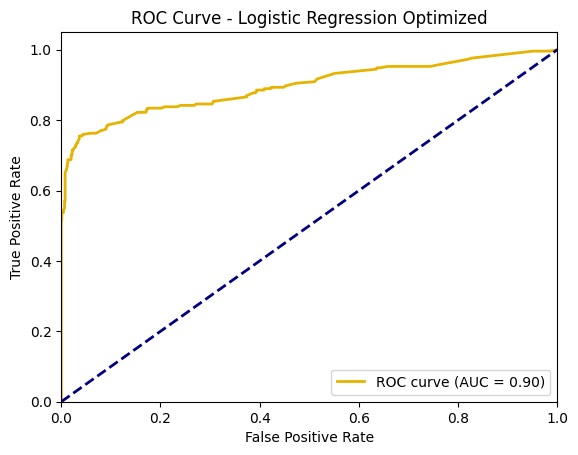

In [30]:
X = df_discretized.drop(columns=['BAD'])
y = df_discretized['BAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_log = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=model_log, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Meilleurs hyperparamètres : ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
classif_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("Matrice de confusion :\n", conf_matrix)
print("\nRapport de classification :\n", classif_report)
print(f"Accuracy : {accuracy:.2f}")

plt.figure()
plt.plot(fpr, tpr, color=(0.9, 0.7, 0), lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Optimized')
plt.legend(loc="lower right")
plt.show()
